In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
df_canada = pd.read_csv('df_clean.csv')
df_canada

,Unnamed: 0,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,0,Immigrants,Foreigners,Afghanistan,935.0,Asia,5501.0,Southern Asia,902.0,Developing regions,...,2978.0,3436.0,3009.0,2652.0,2111.0,1746.0,1758.0,2203.0,2635.0,2004.0
1,1,Immigrants,Foreigners,Albania,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,...,1450.0,1223.0,856.0,702.0,560.0,716.0,561.0,539.0,620.0,603.0
2,2,Immigrants,Foreigners,Algeria,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,...,3616.0,3626.0,4807.0,3623.0,4005.0,5393.0,4752.0,4325.0,3774.0,4331.0
3,3,Immigrants,Foreigners,American Samoa,909.0,Oceania,957.0,Polynesia,902.0,Developing regions,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,Immigrants,Foreigners,Andorra,908.0,Europe,925.0,Southern Europe,901.0,Developed regions,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,190,Immigrants,Foreigners,Viet Nam,935.0,Asia,920.0,South-Eastern Asia,902.0,Developing regions,...,1816.0,1852.0,3153.0,2574.0,1784.0,2171.0,1942.0,1723.0,1731.0,2112.0
191,191,Immigrants,Foreigners,Western Sahara,903.0,Africa,912.0,Northern Africa,902.0,Developing regions,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
192,192,Immigrants,Foreigners,Yemen,935.0,Asia,922.0,Western Asia,902.0,Developing regions,...,124.0,161.0,140.0,122.0,133.0,128.0,211.0,160.0,174.0,217.0
193,193,Immigrants,Foreigners,Zambia,903.0,Africa,910.0,Eastern Africa,902.0,Developing regions,...,56.0,91.0,77.0,71.0,64.0,60.0,102.0,69.0,46.0,59.0


In [49]:
df_canada.drop(['Unnamed: 0','Type','Coverage','AREA','REG','DEV'],axis=1,inplace=True)
df_canada.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_canada.columns = list(map(str,df_canada.columns))
df_canada.set_index('Country',inplace=True)
df_canada.index.name = None
years = list(map(str,range(1980,2014)))
df_canada['Total'] = df_canada.sum(axis=1)


C:\Users\angel\AppData\Local\Temp\ipykernel_21028\1484805227.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_canada['Total'] = df_canada.sum(axis=1)


In [99]:
df_canada.to_csv('df_canada.csv')

C:\Users\angel\AppData\Local\Temp\ipykernel_21028\3926202618.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_continents = df_canada.groupby('Continent', axis=0).sum()


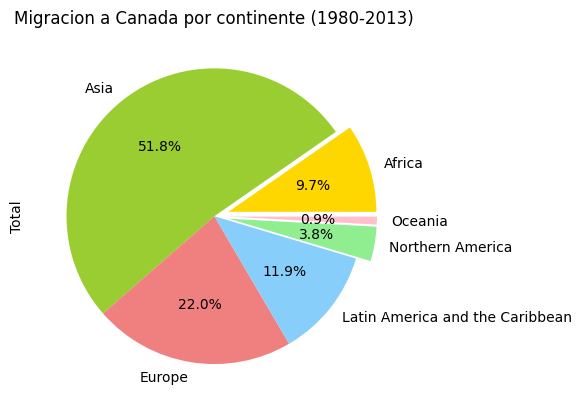

In [50]:
# Crear un pie chart
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents = df_canada.groupby('Continent', axis=0).sum()
df_continents['Total'].plot(kind='pie',autopct= '%1.1f%%',colors=colors_list,explode=explode_list)
plt.title('Migracion a Canada por continente (1980-2013)',loc='center')
#plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

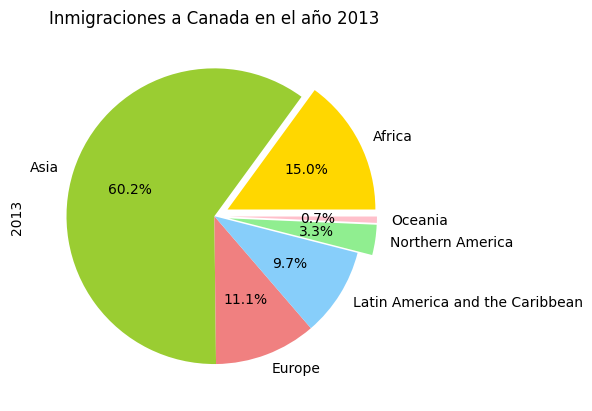

In [51]:
df_continents['2013'].plot(kind='pie',autopct='%1.1f%%',colors=colors_list,explode=explode_list)
plt.title('Inmigraciones a Canada en el año 2013')
plt.show()

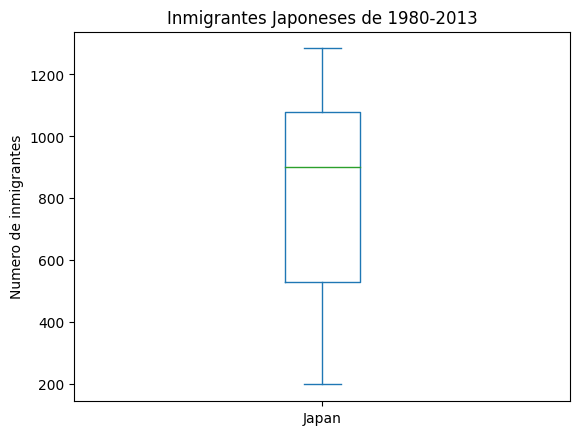

In [52]:
# Crear box plots
df_japan = df_canada.loc[['Japan'],years].transpose()
df_japan.rename(columns={87:'Japan'}, inplace=True)
df_japan.plot(kind='box')
plt.title('Inmigrantes Japoneses de 1980-2013')
plt.ylabel('Numero de inmigrantes')
plt.show()

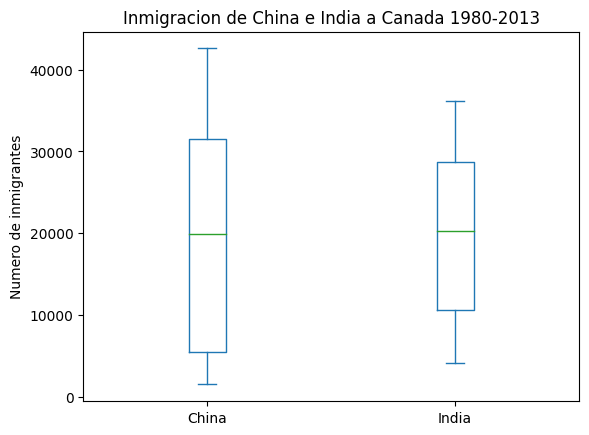

In [53]:
df_ChiInd = df_canada.loc[['China','India'],years].transpose()
df_ChiInd.plot(kind='box')
plt.title('Inmigracion de China e India a Canada 1980-2013')
plt.ylabel('Numero de inmigrantes')
plt.show()

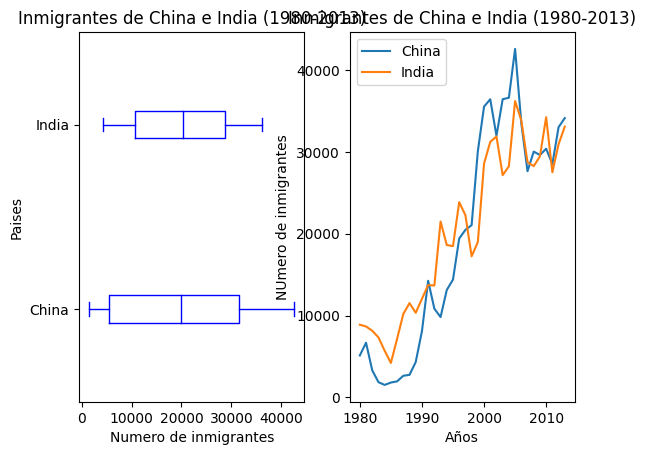

In [54]:
# Subplots

# Se crea el objeto para dividir el canvas
fig = plt.figure()

# Se definen la cantidad de lineas, columnas y graficos que se van a hacer
ax0 = fig.add_subplot(1,2,1) # 1 fila, 2 columnas, 1ra posicion
ax1 = fig.add_subplot(1,2,2)

# Se crea el 1er plot (Boxplot)
df_ChiInd.plot(kind='box',color='blue',vert=False,ax=ax0)
ax0.set_title('Inmigrantes de China e India (1980-2013)')
ax0.set_xlabel('Numero de inmigrantes')
ax0.set_ylabel('Paises')

# Se crea el 2do plot (Lineplot)
df_ChiInd.plot(kind='line',ax=ax1)
ax1.set_title('Inmigrantes de China e India (1980-2013)')
ax1.set_xlabel('Años')
ax1.set_ylabel('NUmero de inmigrantes')

# Se muestran los grafico
plt.show()



In [55]:
# Crear un plot por decadas

# Obtener los datos por total
df_top15 = df_canada.sort_values(by='Total', ascending=False,axis=0).head(15)


In [56]:
# Obtener los datos por decadas

# Crear listas por años en cada decada
years_80s = list(map(str,range(1980,1990)))
years_90s = list(map(str,range(1990,2000)))
years_00s = list(map(str,range(2000,2010)))

# Se divide el dataframe en cada decada
df_80s = df_top15.loc[:, years_80s].sum(axis=1)
df_90s = df_top15.loc[:,years_90s].sum(axis=1)
df_00s = df_top15.loc[:,years_00s].sum(axis=1)

# Se unen las tres series en un nuevo dataframe
new_df = pd.DataFrame({'1980s':df_80s, '1990s':df_90s, '2000s':df_00s})
new_df


,1980s,1990s,2000s
India,82154.0,180395.0,303591.0
China,32003.0,161528.0,340385.0
United Kingdom of Great Britain and Northern Ireland,179171.0,261966.0,83413.0
Philippines,60764.0,138482.0,172904.0
Pakistan,10591.0,65302.0,127598.0
United States of America,76824.0,56915.0,75173.0
Iran (Islamic Republic of),21477.0,54871.0,65794.0
Sri Lanka,14796.0,70421.0,49678.0
Republic of Korea,16259.0,38189.0,68183.0
Poland,57602.0,64864.0,13629.0


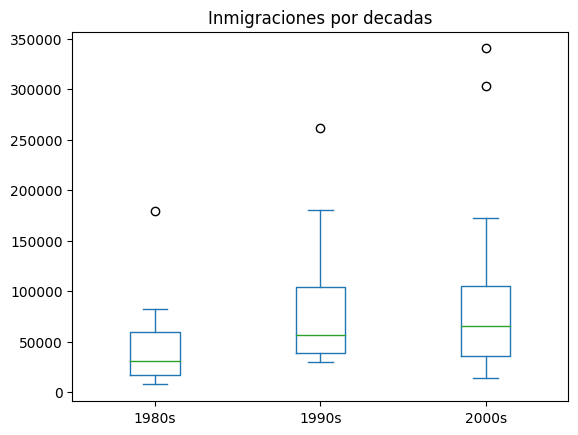

In [57]:
new_df.plot(kind='box')
plt.title('Inmigraciones por decadas')
plt.show()

In [58]:
# Se calcula el rango intercuantil (IQR), que define los valores outliers
df_00s.quantile(0.25)
df_00s.quantile(0.75)
IQR = df_00s.quantile(0.75) - df_00s.quantile(0.25)
IQR

69404.0

In [59]:
# Se obtienen los valores outliers
outlier = df_00s.quantile(0.75) +(1.5 * IQR)

new_df = new_df.reset_index()
new_df[new_df['2000s'] > outlier]

,index,1980s,1990s,2000s
0,India,82154.0,180395.0,303591.0
1,China,32003.0,161528.0,340385.0


Diagramas de dispersion

In [60]:
# Obtener la poblacion total por año
df_total = pd.DataFrame(df_canada[years].sum(axis=0))

# Cambiar los años a tipo int (para la regresion)
df_total.index = map(int, df_total.index)

# Resetear los indices y ponerlos nuevamente en el dataframe
df_total.reset_index(inplace=True)

# Renombrar las columnas
df_total.columns = ['year','total']

df_total.head()

,year,total
0,1980,99137.0
1,1981,110563.0
2,1982,104271.0
3,1983,75550.0
4,1984,73417.0


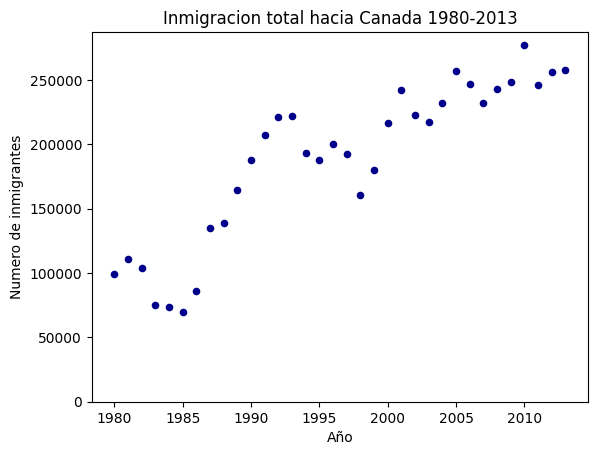

In [61]:
# Graficar diagrama de dispersion
df_total.plot(kind='scatter',x='year',y='total',color='darkblue')
plt.title('Inmigracion total hacia Canada 1980-2013')
plt.xlabel('Año')
plt.ylabel('Numero de inmigrantes')
plt.ylim(0,)
plt.show()

In [65]:
# Predecir el numero de inmigrantes para 2015

# Obtener la ecuacion de la recta
x = df_total['year']
y = df_total['total']
fit = np.polyfit(x,y,deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

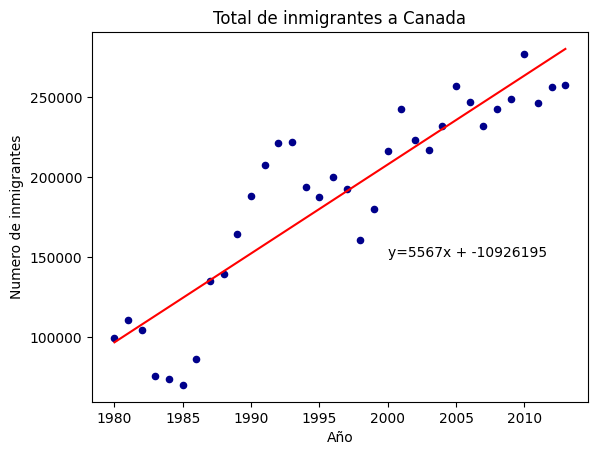

'No. inmigrantes = 5567 * year + -10926195'

In [63]:
# Graficar el diagrama de dispersion
df_total.plot(kind='scatter',x='year',y='total',color='darkblue')
plt.title('Total de inmigrantes a Canada')
plt.xlabel('Año')
plt.ylabel('Numero de inmigrantes')

# Graficar la linea de mejor ajuste
plt.plot(x,fit[0]*x+fit[1],color='red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

# Imprimir la linea
'No. inmigrantes = {0:.0f} * year + {1:.0f}'.format(fit[0],fit[1])

In [64]:
fit[0]*2015+fit[1]

291495.70725744776

In [84]:
df_countries = df_canada.loc[['Denmark','Norway','Sweden'],years].transpose()
df_prueba = pd.DataFrame(df_countries.sum(axis=1))
df_prueba.reset_index(inplace=True)
df_prueba.columns = ['year','total']
df_prueba['year'] = df_prueba['year'].astype(int)
df_prueba.head(2)

,year,total
0,1980,669.0
1,1981,678.0


In [88]:
# Obtener la ecuacion de la recta
x = df_prueba['year']
y = df_prueba['total']
fit = np.polyfit(x,y,deg=1)

In [ ]:
df_prueba.plot(kind='scatter',x='year',y='total',color='green')
plt.title('Inmigraciones a Canada desde Dinamarca,Noruwga y Suiza')
plt.xlabel('Año')
plt.ylabel('Numero de inmigrantes')
plt.show()

# Graficar la linea de mejor ajuste
plt.plot(x,fit[0]*x+fit[1],color='red')
plt.annotate('y={0:.0f}x + {1:.0f}'.format(fit[0],fit[1]),xy=(2000,150000))
plt.show()

Bubble plots

In [93]:
# transposed dataframe
df_can_t = df_canada[years].transpose()

# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

# view the changes
df_can_t.head()

,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16.0,1.0,80.0,0.0,0.0,1.0,0.0,368.0,0.0,...,9378.0,128.0,0.0,0.0,103.0,1191.0,0.0,1.0,11.0,72.0
1,1981,39.0,0.0,67.0,1.0,0.0,3.0,0.0,426.0,0.0,...,10030.0,132.0,0.0,0.0,117.0,1829.0,0.0,2.0,17.0,114.0
2,1982,39.0,0.0,71.0,0.0,0.0,6.0,0.0,626.0,0.0,...,9074.0,146.0,0.0,0.0,174.0,2162.0,0.0,1.0,11.0,102.0
3,1983,47.0,0.0,69.0,0.0,0.0,6.0,0.0,241.0,0.0,...,7100.0,105.0,0.0,0.0,124.0,3404.0,0.0,6.0,7.0,44.0
4,1984,71.0,0.0,63.0,0.0,0.0,4.0,42.0,237.0,0.0,...,6661.0,90.0,0.0,0.0,142.0,7583.0,0.0,0.0,16.0,32.0


In [94]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

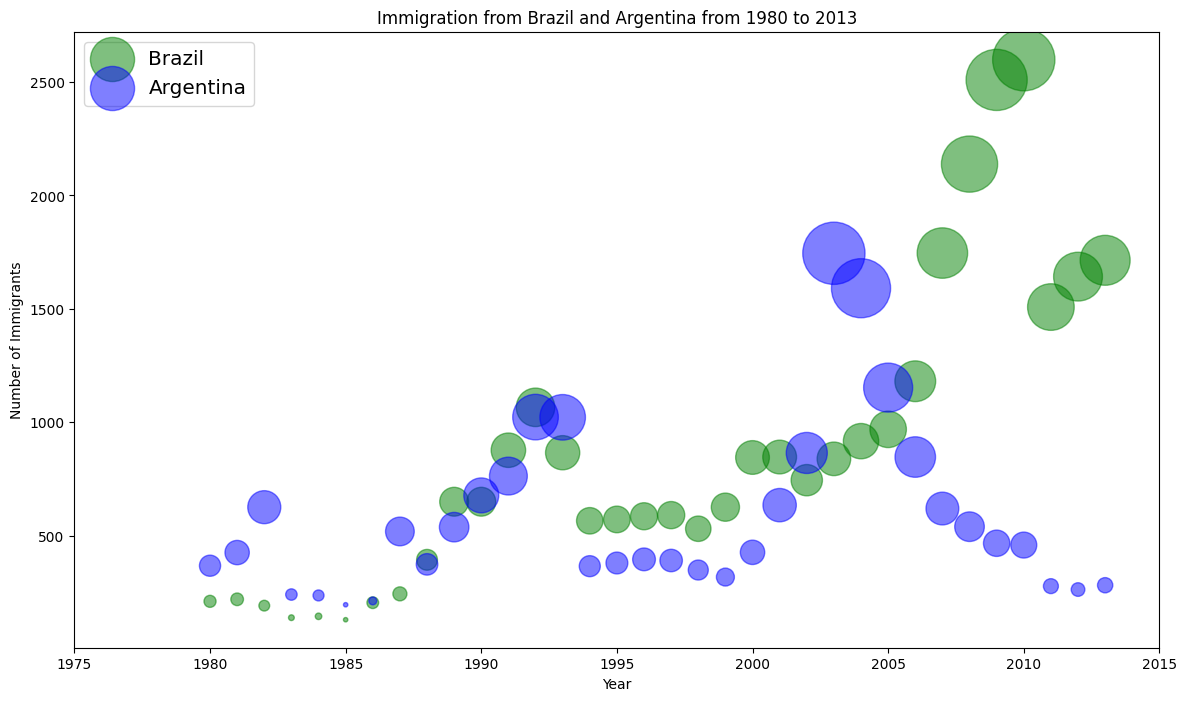

In [97]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 to 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

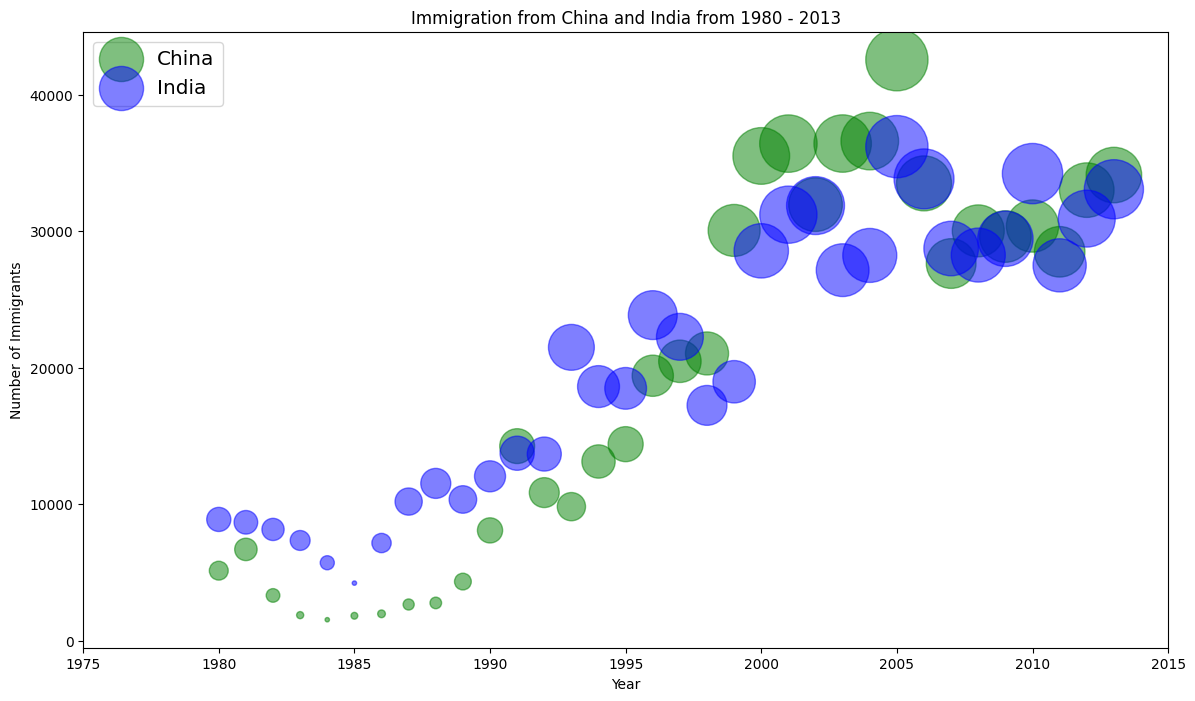

In [98]:
# Bubble plot para China e India

# normalized Chinese data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
# normalized Indian data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())

# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')